# Relationship between a Star's Luminosity and Mass

A star has numerous properties that each are connected and interowoven to create a massive celestial object that constantly produce fusion reactions to create enormous amounts of energy. The ones that are going to be focused on here is if there is a relationship between the luminosity of the star compared to the mass that it has, and is there an equation that can correlate the two variables together. I will be using the data set from the database VizieR V/19 (Piskunov A.).

In this project I hope that I am able to solve these questions:
- Is there any correlation between Luminosity and Mass? ✓
- Are we able to visualize the results? ✓
- What equation(s) can we create that matches the relationship between the two variables?

This is the full data set that I plan on using, we will only be focusing on Luminosity and Mass in this scenario however the others may be important for future study:


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import *

star_data = pd.read_csv("C:\\Users\\Owner\\PycharmProjects\\Luminosity_Mass_Relationship\\Star_Cluster_Data.csv", engine='python')  # Data set being used

print(star_data.head()) # First 5 points in the data set

   Cluster_number  Number_Withing_Cluster  UBV_Source_ID  B-V_Colour_Index  \
0               1                       1            454              0.45   
1               1                       1            454              0.45   
2               1                       1            454              0.45   
3               1                       2              0              0.71   
4               1                       2              0              0.71   

   V_Magnitude  Adopted_Luminosity_Class  Logarithm_Of_Effective_Temperature  \
0         7.32                         1                               3.808   
1         7.32                         1                               3.808   
2         7.32                         1                               3.808   
3         7.38                         1                               3.767   
4         7.38                         1                               3.767   

   Logarithm_Of_Luminosity  Age_of_Star  Mass_of_S

In [14]:
print(star_data.tail()) # Final 5 points for the data set

     Cluster_number  Number_Withing_Cluster  UBV_Source_ID  B-V_Colour_Index  \
495               5                       1            497             -0.18   
496               5                       2            522             -0.21   
497               5                       3            552              1.48   
498               5                       3            552              1.48   
499               5                       3            552              1.48   

     V_Magnitude  Adopted_Luminosity_Class  \
495         9.19                         5   
496         9.45                         5   
497         9.46                         1   
498         9.46                         1   
499         9.46                         1   

     Logarithm_Of_Effective_Temperature  Logarithm_Of_Luminosity  Age_of_Star  \
495                               4.212                     3.59     26280000   
496                               4.250                     3.58     26390000   

# Visual representation of the data set
In this we will be attempting to visualize the data set in order to determine whether there is a pattern in the data set. This should allow us to view a trend in the data and see what relation the two variables could have, if any at all. I will use a scatter plot in order to compute the values and see whether a pattern emerges. We will be using the inital data given to us, which is the log of the luminosity along with the mass of the stars:

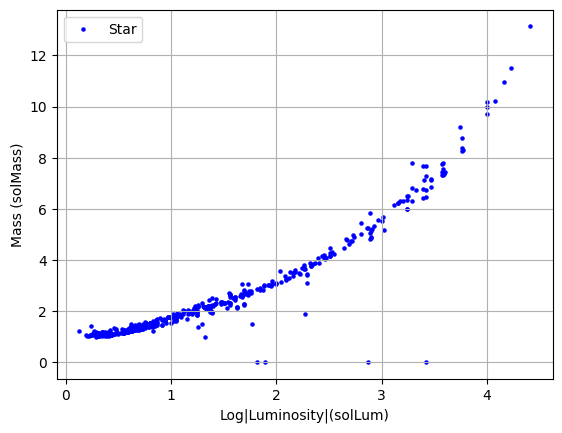

In [31]:
luminosity_data = star_data["Logarithm_Of_Luminosity"]  # Log of Luminosity
mass_data = star_data['Mass_of_Star']  # Mass of the stars

x = luminosity_data
y = mass_data

plt.scatter(x,y,c='b', s=5, label="Star")

plt.xlabel("Log|Luminosity|(solLum)")
plt.ylabel("Mass (solMass)")

plt.legend()
plt.grid()
plt.show()

From here we can see an emerging value from the data set and show the variables that are being used here follow some sort of variance, as the luminosity of the star gets larger and larger, we can turn this around and show the nonlinear regression of the data, this hopefully should show the value of the data and give even more insight:

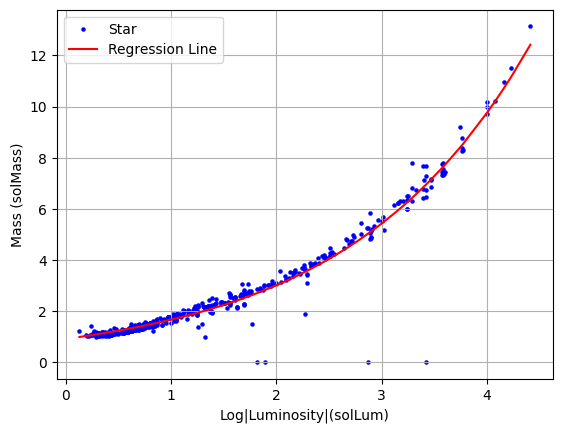

In [27]:
def nonlinear_regr(x,y, a, b, c):  # Nonlinear regression for comparison/connections
    return a-(b*np.exp(c*x)) - y
    
curve, pcov = curve_fit(nonlinear_regr, x, y)
plt.scatter(x,y,c='b', s=5, label="Star") # Initial Scatter plot for comparison
points = nonlinear_regr(x,*curve) # X and Y being calculated for nonlinear regression
regression_curve = plt.plot(sorted(x),sorted(points), c='r', label='Regression Line') 

plt.xlabel("Log|Luminosity|(solLum)")
plt.ylabel("Mass (solMass)")
plt.grid()
plt.legend()
plt.show()

# Conclusion
There is a clear trend between Luminosity and Mass, with the data points and nonlinear line suggesting that it is a direct relationship. From an initial perspective it seems that it as a quadratic or quartic function, however I will need to calculate a bit more to figure those values out.

# References
Piskunov, A. (n.d.). Vizier V/19. https://cdsarc.cds.unistra.fr/viz-bin/cat/V/19 


